In [37]:
%matplotlib inline
import pandas as pd
import numpy as np
import mne
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_welch

df = pd.read_csv('/kaggle/input/hehedsad/extracted_eeg15.csv')

# Đổi tên các kênh trong dữ liệu raw
columns_mapping = {
    'ED_AF3': 'AF3', 
    'ED_F7': 'F7', 
    'ED_F3': 'F3', 
    'ED_FC5': 'FC5', 
    'ED_T7': 'T7', 
    'ED_P7': 'P7', 
    'ED_O1': 'O1', 
    'ED_O2': 'O2', 
    'ED_P8': 'P8', 
    'ED_T8': 'T8', 
    'ED_FC6': 'FC6', 
    'ED_F4': 'F4', 
    'ED_F8': 'F8', 
    'ED_AF4': 'AF4'
}

df = df.rename(columns=columns_mapping)

eeg_data = df.iloc[:,1:-1].values.T 

channel_names = df.iloc[:,1:-1].columns.tolist()
channel_types = ['eeg']*eeg_data.shape[0]
sfreq = 128
info = mne.create_info(ch_names=channel_names,ch_types=channel_types,sfreq=sfreq)

In [3]:
info.set_montage('standard_1020')
print('Event created :', info)    

Event created : <Info | 8 non-empty values
 bads: []
 ch_names: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
 chs: 14 EEG
 custom_ref_applied: False
 dig: 17 items (3 Cardinal, 14 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 128.0 Hz
>


In [4]:
raw = mne.io.RawArray(eeg_data,info)
raw

Creating RawArray with float64 data, n_channels=14, n_times=443972
    Range : 0 ... 443971 =      0.000 ...  3468.523 secs
Ready.


<RawArray | 14 x 443972 (3468.5 s), ~47.4 MB, data loaded>

Using matplotlib as 2D backend.


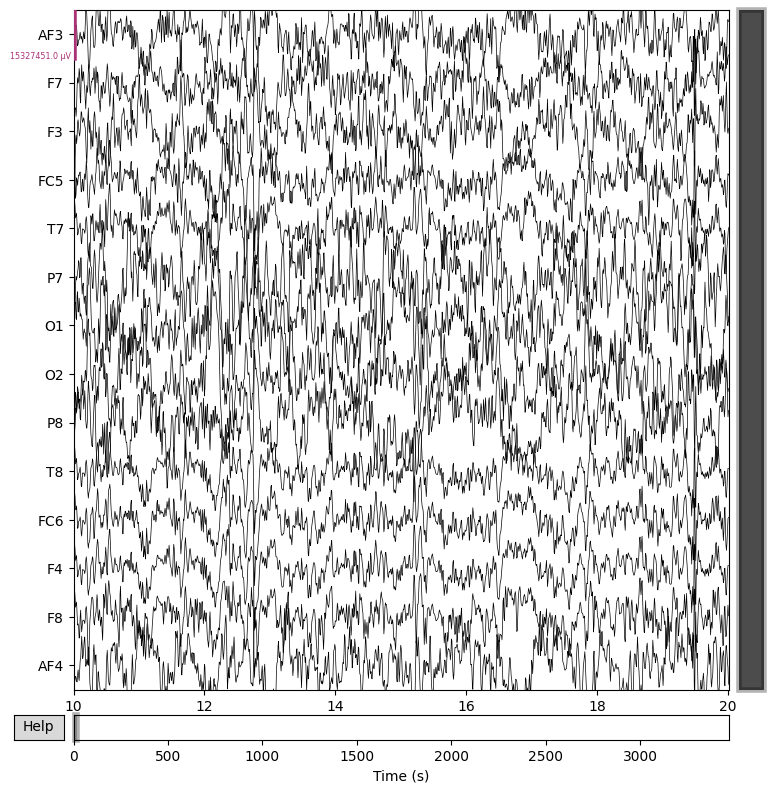

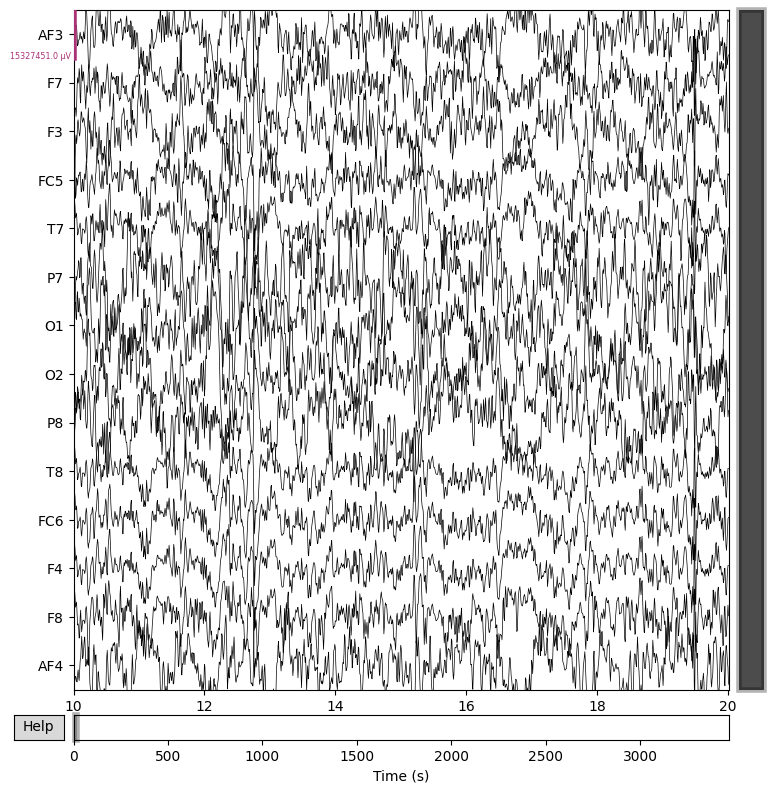

In [5]:
raw.plot(scalings='auto',clipping=None,n_channels=14,start=10,duration=10,remove_dc=False,show=True)

# What are artifacts?
Artifacts are parts of the recorded signal that arise from sources other than the source of interest (i.e., neuronal activity in the brain). As such, artifacts are a form of interference or noise relative to the signal of interest. There are many possible causes of such interference, for example:

- Environmental artifacts
    - Persistent oscillations centered around the AC power line frequency (typically 50 or 60 Hz)

    - Brief signal jumps due to building vibration (such as a door slamming)

    - Electromagnetic field noise from nearby elevators, cell phones, the geomagnetic field, etc.

- Instrumentation artifacts
    - Electromagnetic interference from stimulus presentation (such as EEG sensors picking up the field generated by unshielded headphones)

    - Continuous oscillations at specific frequencies used by head position indicator (HPI) coils

    - Random high-amplitude fluctuations (or alternatively, constant zero signal) in a single channel due to sensor malfunction (e.g., in surface electrodes, poor scalp contact)

- Biological artifacts
    - Periodic QRS-like signal patterns (especially in magnetometer channels) due to electrical activity of the heart

    - Short step-like deflections (especially in frontal EEG channels) due to eye movements

    - Large transient deflections (especially in frontal EEG channels) due to blinking

    - Brief bursts of high frequency fluctuations across several channels due to the muscular activity during swallowing

There are also some cases where signals from within the brain can be considered artifactual. For example, if a researcher is primarily interested in the sensory response to a stimulus, but the experimental paradigm involves a behavioral response (such as button press), the neural activity associated with the planning and executing the button press could be considered an artifact relative to signal of interest (i.e., the evoked sensory response).

In [6]:
filt_raw = raw.copy().filter(l_freq=1.0,h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 423 samples (3.305 s)



In [7]:
from mne.preprocessing import ICA
ica = ICA(n_components=None, max_iter="auto", random_state=42)
ica.fit(filt_raw)
ica

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 11.2s.


<ICA | raw data decomposition, method: fastica (fit in 24 iterations on 443972 samples), 13 ICA components (14 PCA components available), channel types: eeg, no sources marked for exclusion>

In [8]:
explained_var_ratio = ica.get_explained_variance_ratio(filt_raw)
for channel_type, ratio in explained_var_ratio.items():
    print(f"Fraction of {channel_type} variance explained by all components: {ratio}")

Fraction of eeg variance explained by all components: 1.0


In [9]:
explained_var_ratio = ica.get_explained_variance_ratio(
    filt_raw, components=[0], ch_type="eeg"
)
# This time, print as percentage.
ratio_percent = round(100 * explained_var_ratio["eeg"])
print(
    f"Fraction of variance in EEG signal explained by first component: "
    f"{ratio_percent}%"
)

Fraction of variance in EEG signal explained by first component: 43%


Creating RawArray with float64 data, n_channels=13, n_times=443972
    Range : 0 ... 443971 =      0.000 ...  3468.523 secs
Ready.


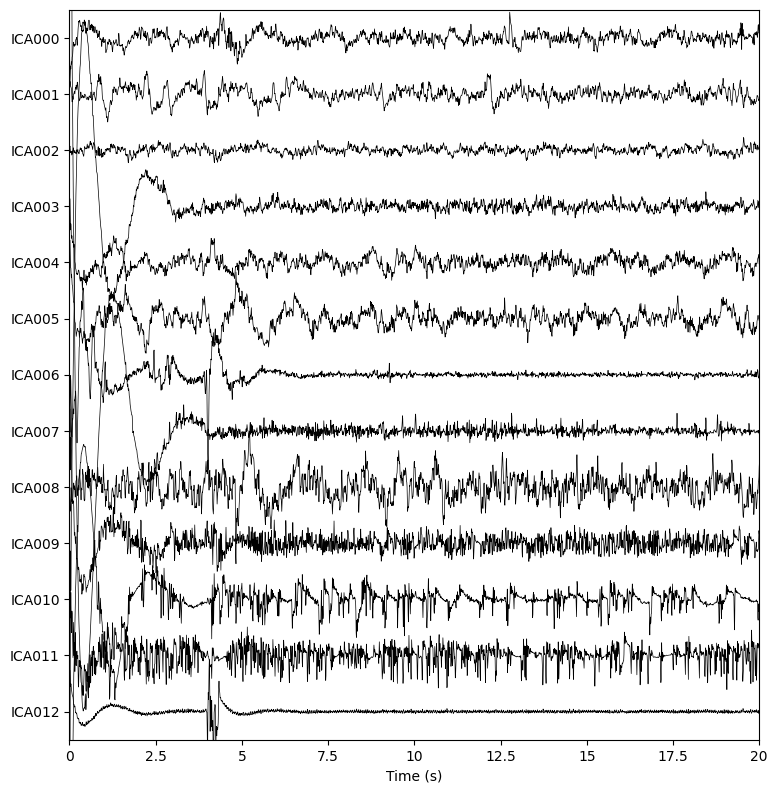

In [10]:
raw.load_data()
ica.plot_sources(raw, show_scrollbars=False,)
plt.show()

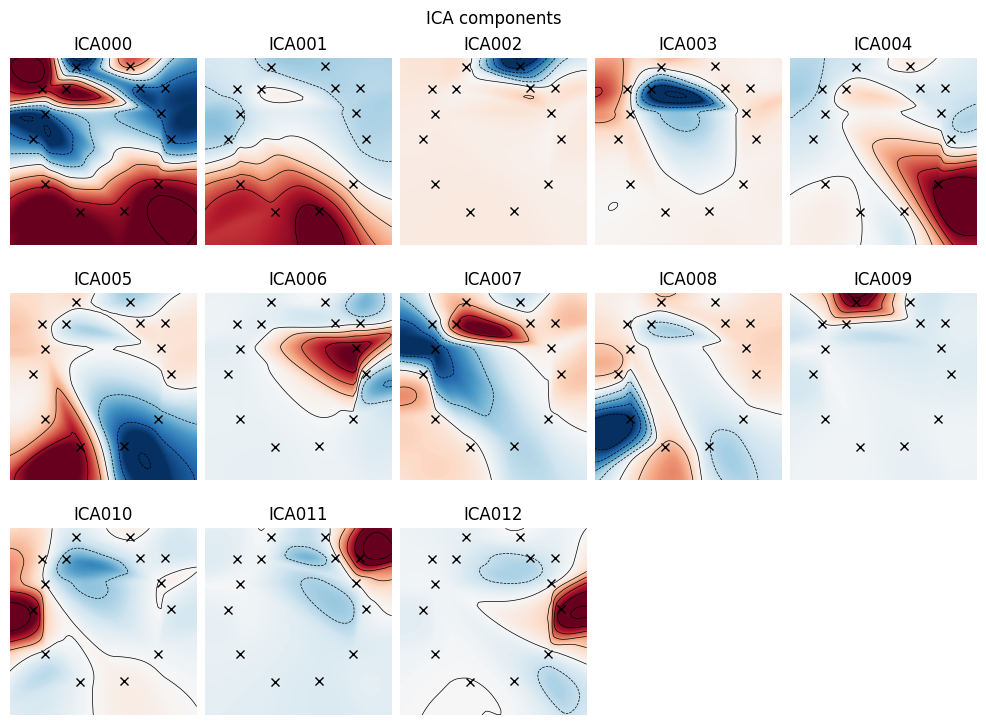

In [11]:
ica.plot_components(outlines=None,sensors='kx')
plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated


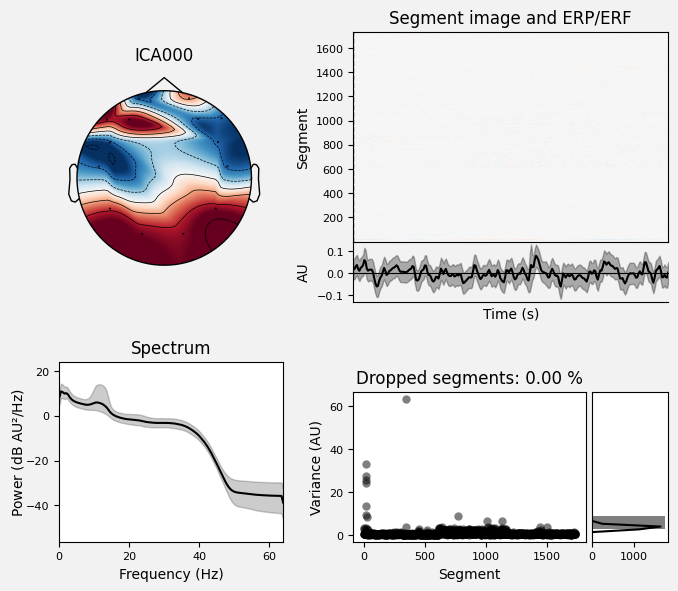

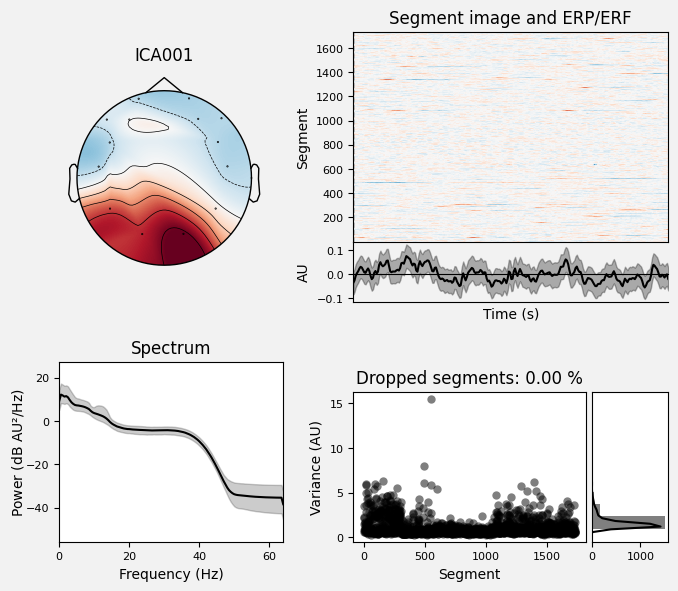

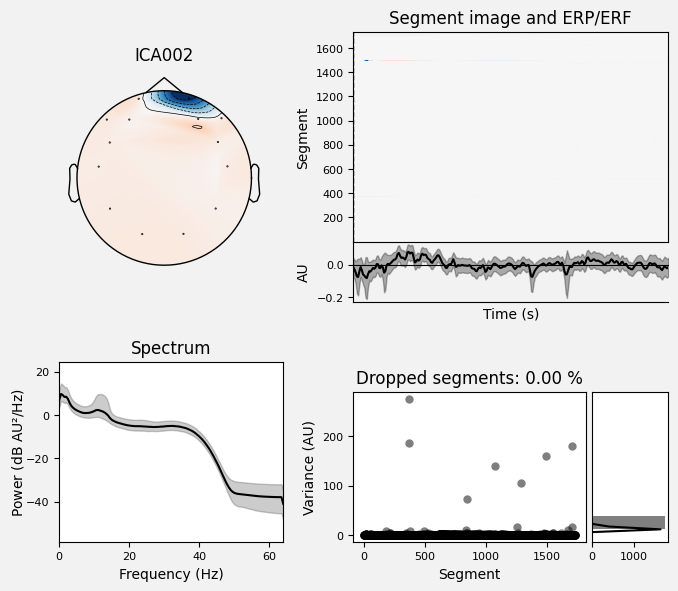

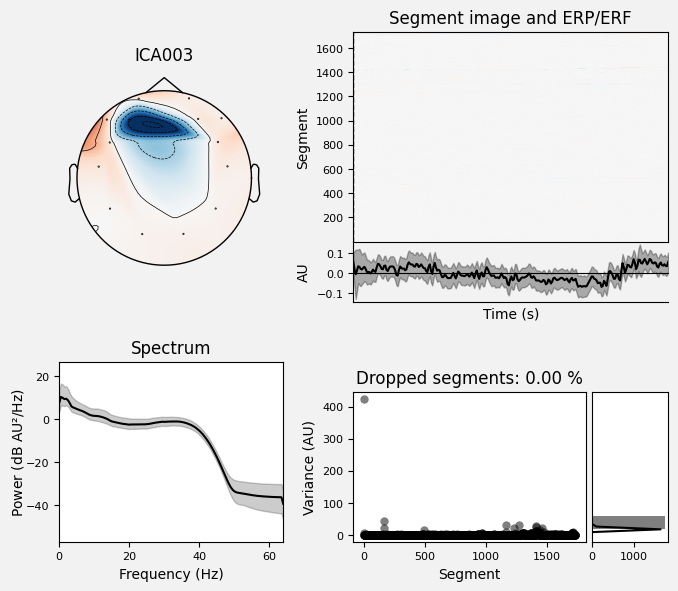

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [12]:
ica.plot_properties(raw,picks=[0,1,2,3])

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated


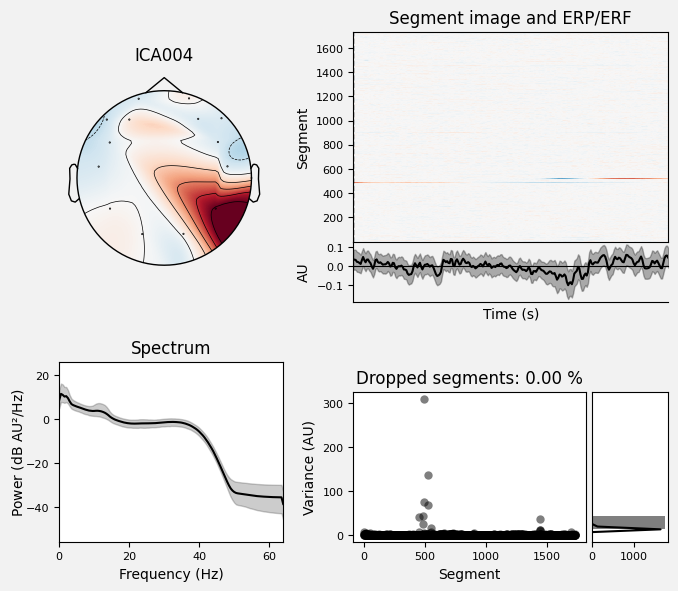

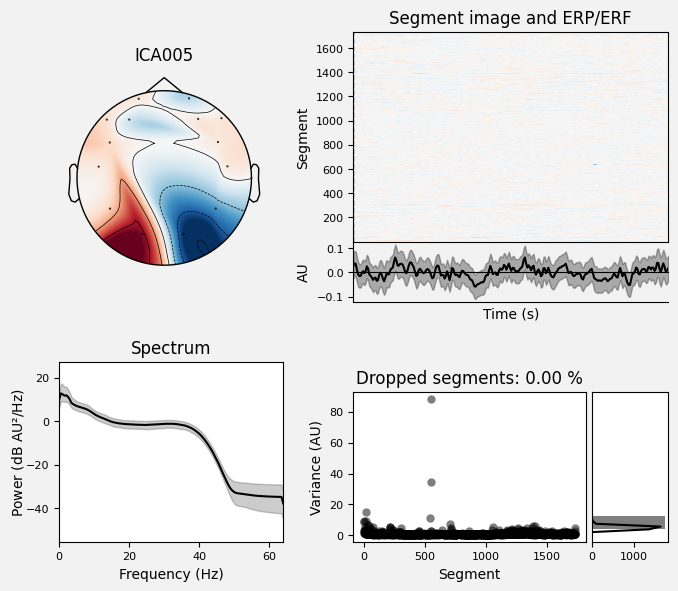

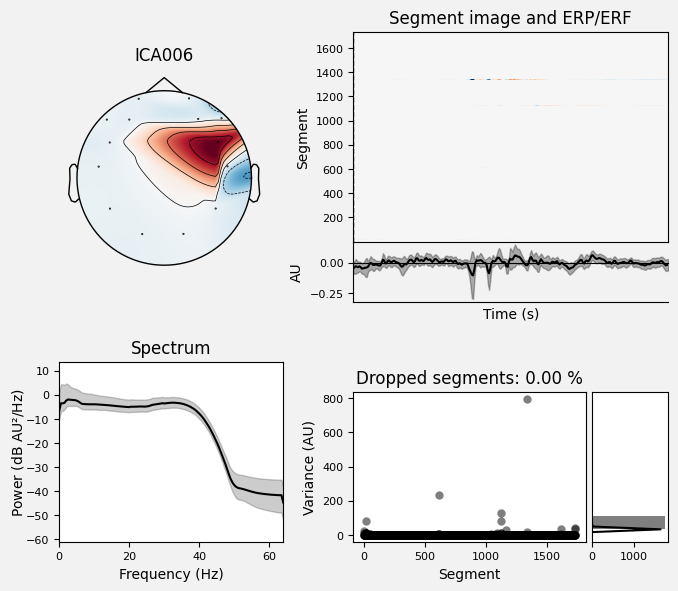

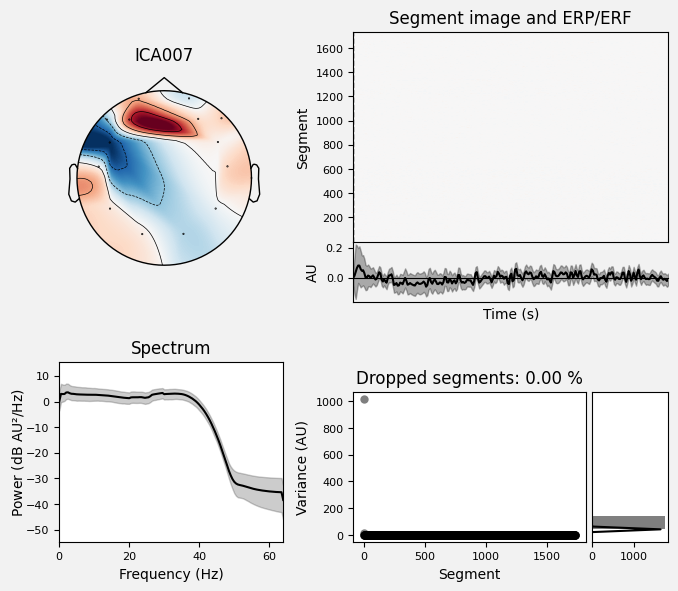

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [13]:
ica.plot_properties(raw,picks=[4,5,6,7])

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated


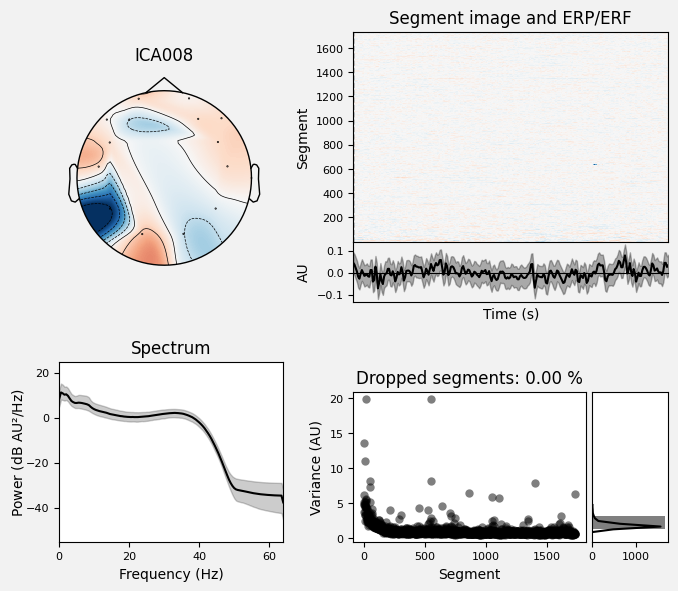

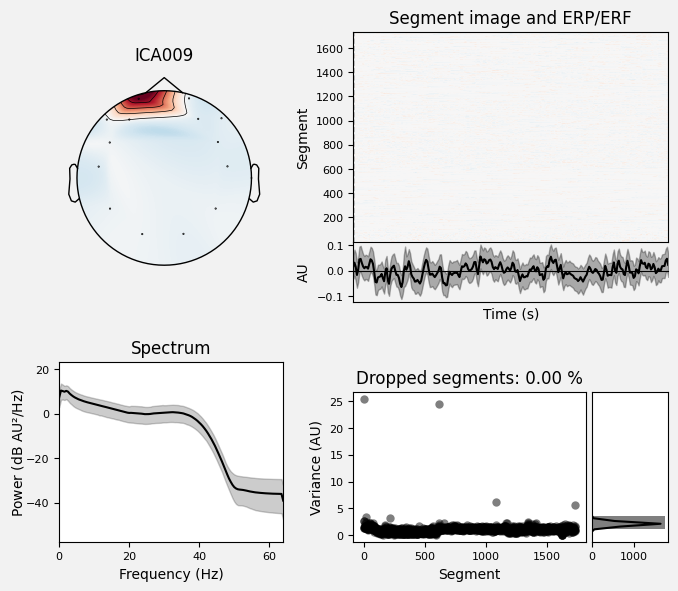

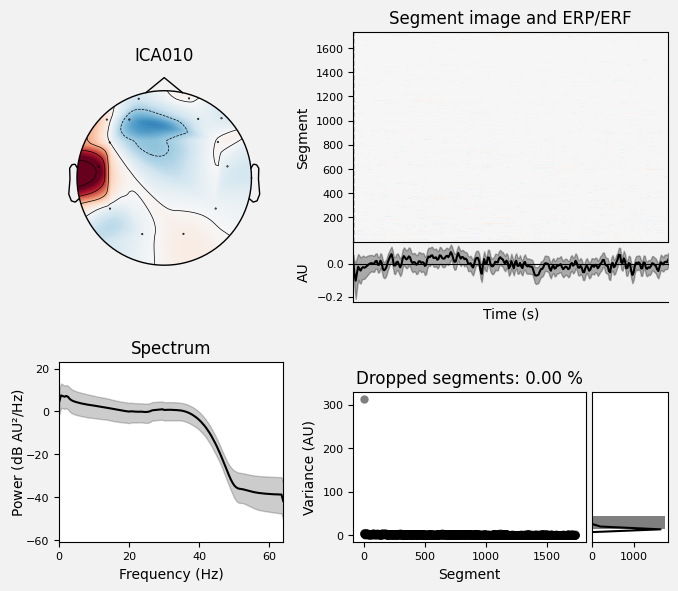

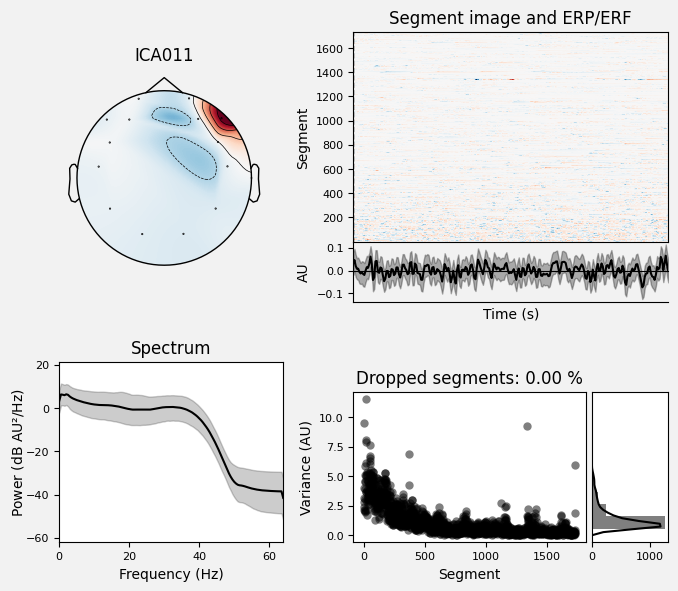

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [14]:
ica.plot_properties(raw,picks=[8,9,10,11])

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1734 matching events found
No baseline correction applied
0 projection items activated


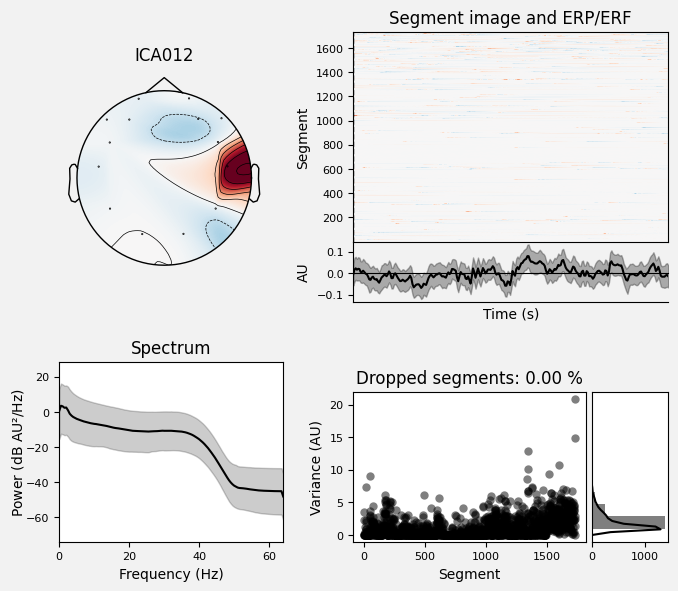

[<Figure size 700x600 with 6 Axes>]

In [15]:
ica.plot_properties(raw,picks=[12])

Effective window size : 32.000 (s)


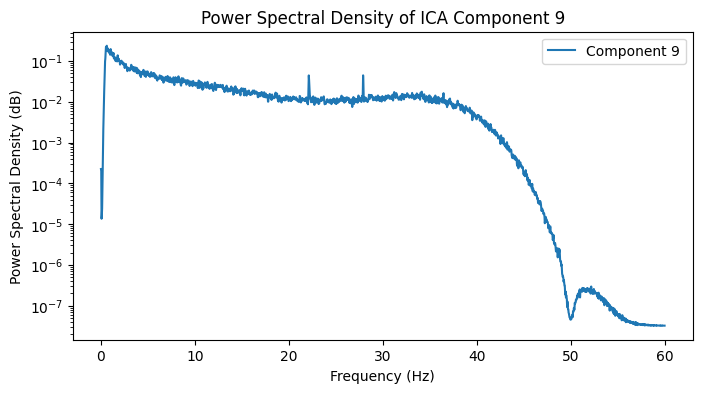

In [41]:
ica_sources = ica.get_sources(raw).get_data()
idx_component = 9

sfreq = raw.info['sfreq']  # Tần số lấy mẫu
fmin, fmax = 0, 60  # Dải tần số cần phân tích

psds, freqs = psd_array_welch(ica_sources[idx_component], sfreq=sfreq, fmin=fmin, fmax=fmax, n_fft=4096)

plt.figure(figsize=(8, 4))
plt.semilogy(freqs, psds, label=f'Component {idx_component}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.title(f'Power Spectral Density of ICA Component {idx_component}')
plt.legend()
plt.show()


Effective window size : 32.000 (s)
Effective window size : 32.000 (s)
Effective window size : 32.000 (s)
Effective window size : 32.000 (s)
Effective window size : 32.000 (s)
Effective window size : 32.000 (s)
Effective window size : 32.000 (s)
Effective window size : 32.000 (s)
Effective window size : 32.000 (s)
Effective window size : 32.000 (s)
Effective window size : 32.000 (s)
Effective window size : 32.000 (s)
Effective window size : 32.000 (s)


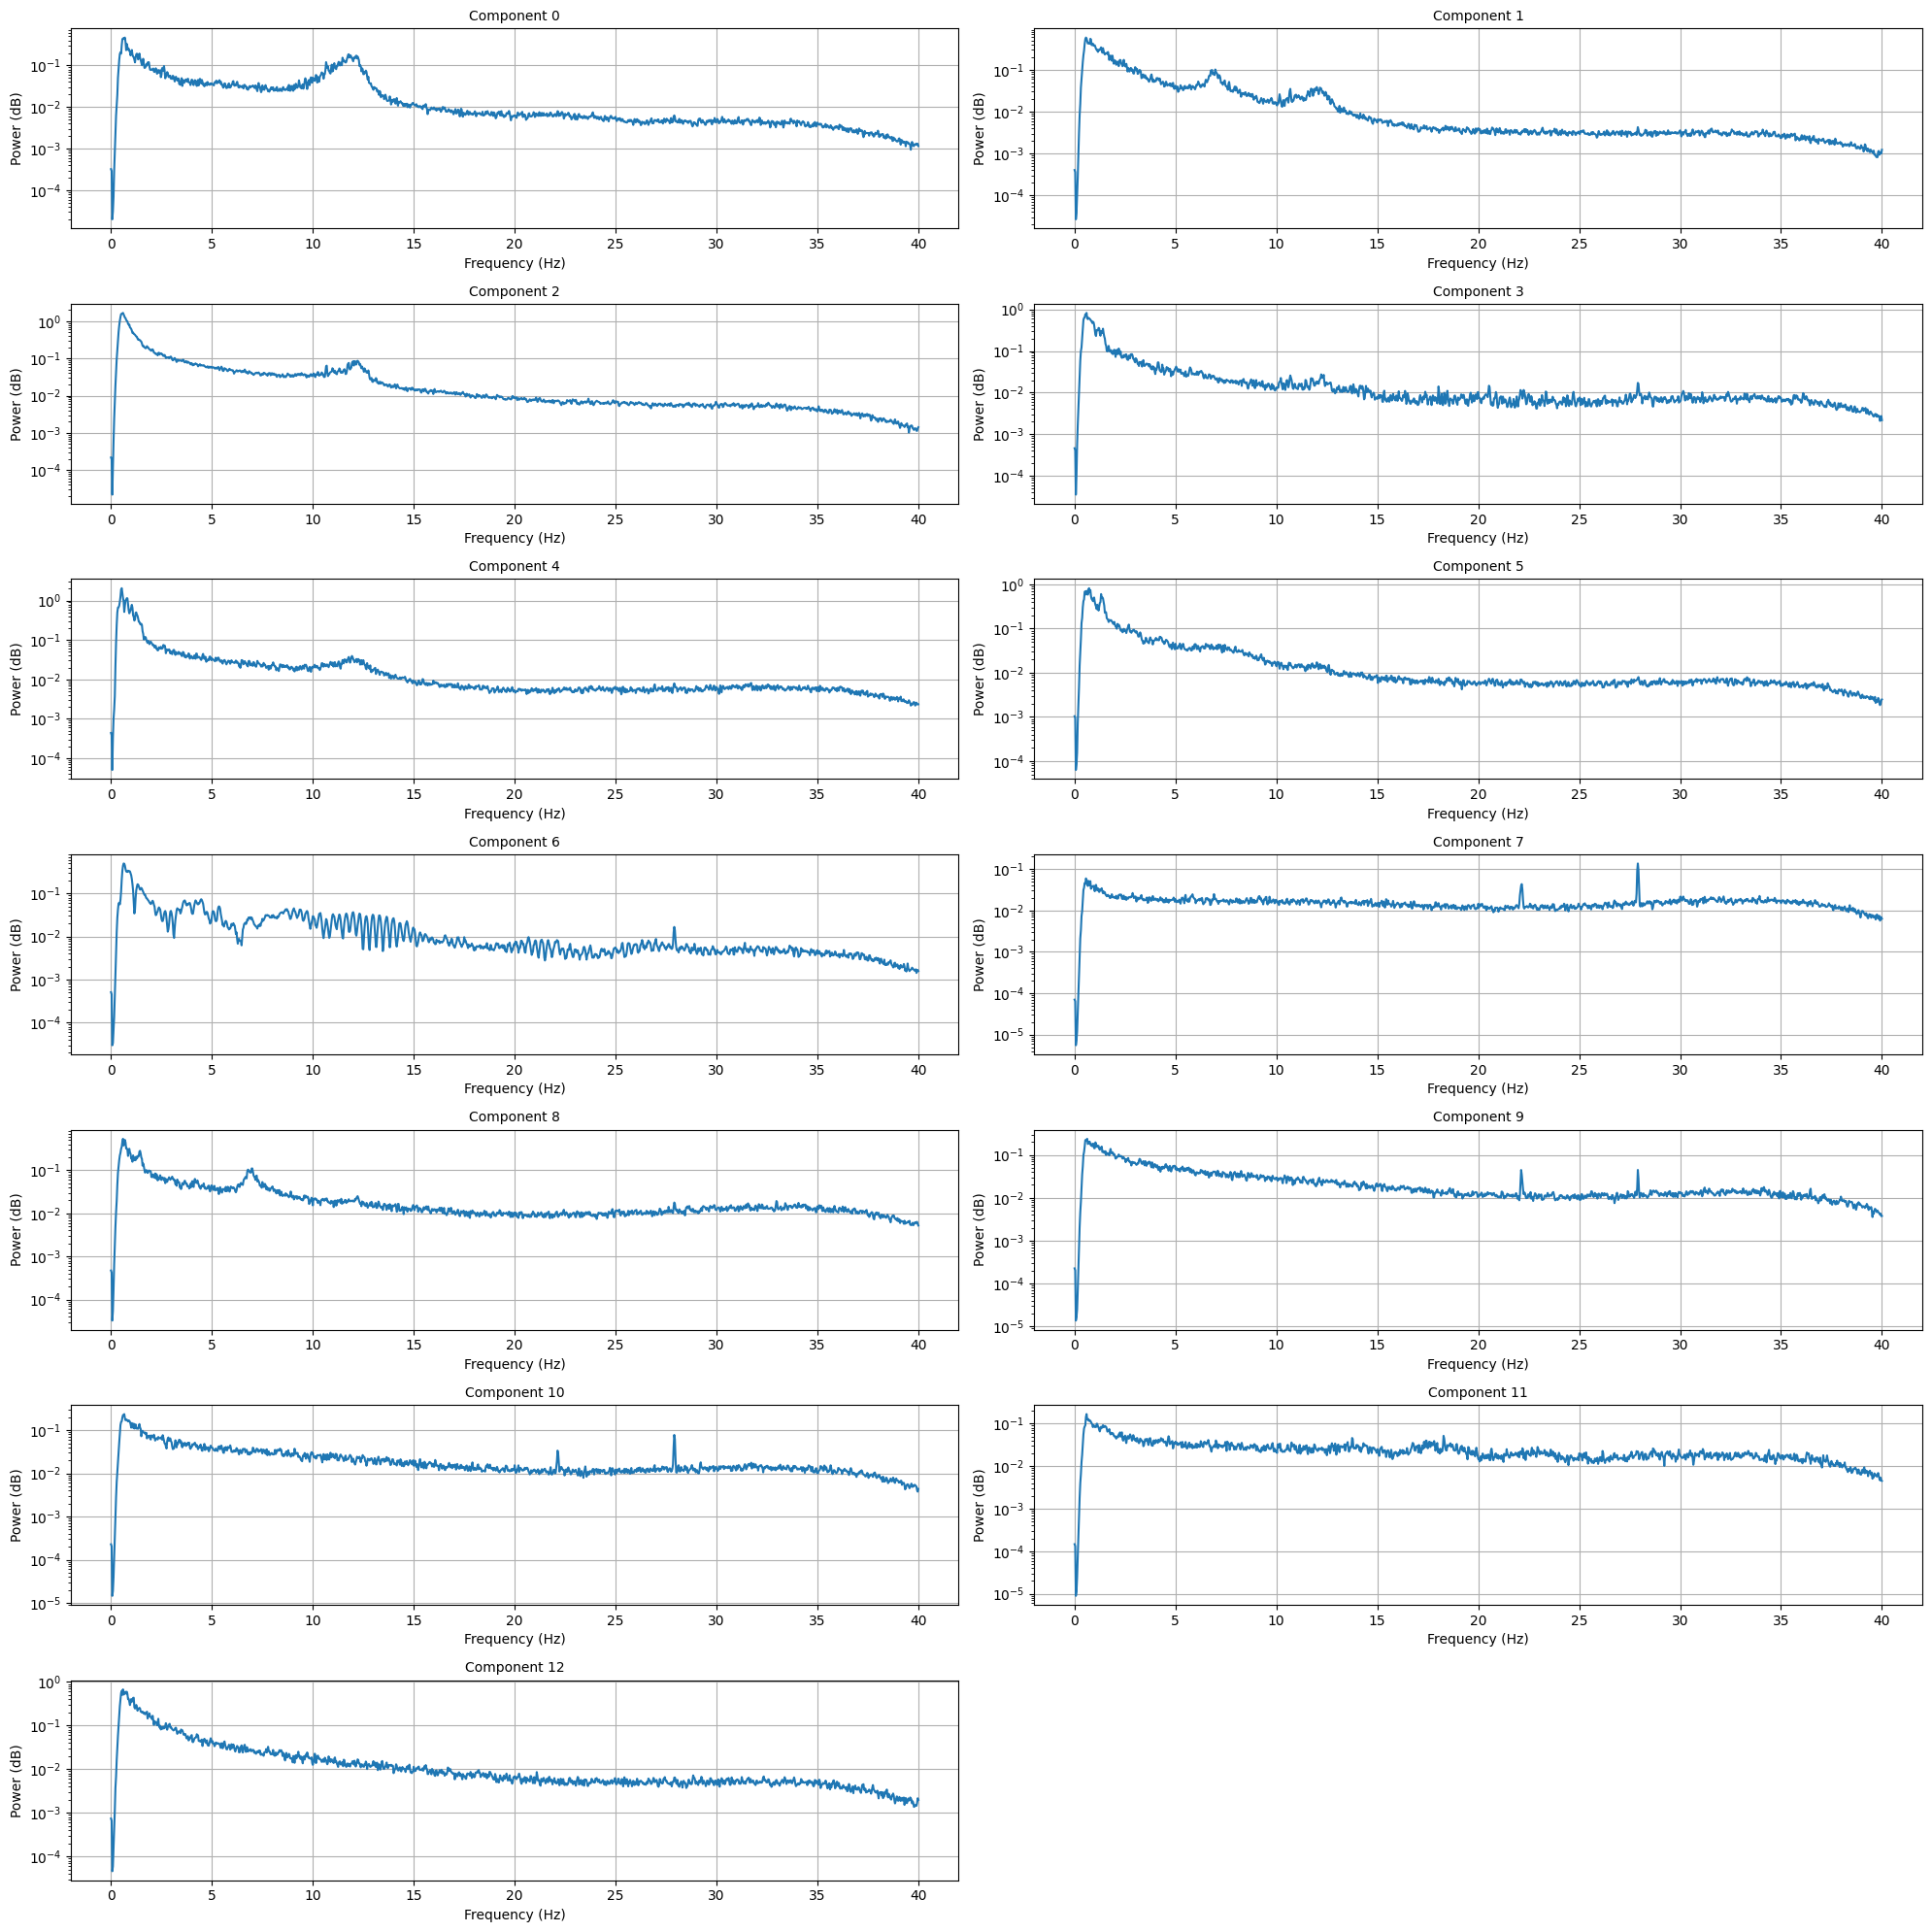

In [44]:
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_welch

ica_sources = ica.get_sources(raw).get_data()  # Tín hiệu các thành phần ICA
sfreq = raw.info['sfreq']  # Tần số lấy mẫu
fmin, fmax = 0, 40  # Dải tần số

fig, axes = plt.subplots(7, 2, figsize=(20, 20))  # Tạo lưới 7x2 (14 ô), đủ cho 13 thành phần
axes = axes.flatten()  # Làm phẳng danh sách axes để dễ truy cập

for idx_component in range(13):
    psds, freqs = psd_array_welch(
        ica_sources[idx_component], sfreq=sfreq, fmin=fmin, fmax=fmax, n_fft=4096
    )
    ax = axes[idx_component]
    ax.semilogy(freqs, psds)
    ax.set_title(f'Component {idx_component}', fontsize=10)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Power (dB)')
    ax.grid(True)

# Ẩn ô trống nếu có
for i in range(13, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_welch

# Trích xuất tín hiệu từ ICA
ica_sources = ica.get_sources(raw).get_data()
sfreq = raw.info['sfreq']  # Tần số lấy mẫu
fmin, fmax = 0.5, 80  # Dải tần số cần phân tích

# Tạo lưới các subplot (4 hàng, 4 cột, đủ cho 13 thành phần)
fig, axes = plt.subplots(7, 2, figsize=(20, 20))
axes = axes.flatten()  # Làm phẳng mảng axes để dễ dàng truy cập

for idx_component in range(13):
    # Tính PSD
    psds, freqs = psd_array_welch(
        ica_sources[idx_component], sfreq=sfreq, fmin=fmin, fmax=fmax, n_fft=4096
    )
    
    # Chuyển đổi PSD sang log (dB)
    psds_log = 10 * np.log10(psds)
    
    # Vẽ trên từng subplot
    ax = axes[idx_component]
    ax.plot(freqs, psds_log)
    ax.set_title(f'Component {idx_component}', fontsize=10)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel(r'Log Power Spectral Density $10 \cdot \log_{10}(\mu V^2 / \mathrm{Hz})$')
    ax.grid(True)

# Ẩn các subplot thừa
for i in range(13, len(axes)):
    fig.delaxes(axes[i])

# Tinh chỉnh khoảng cách giữa các plot
plt.tight_layout()
plt.show()


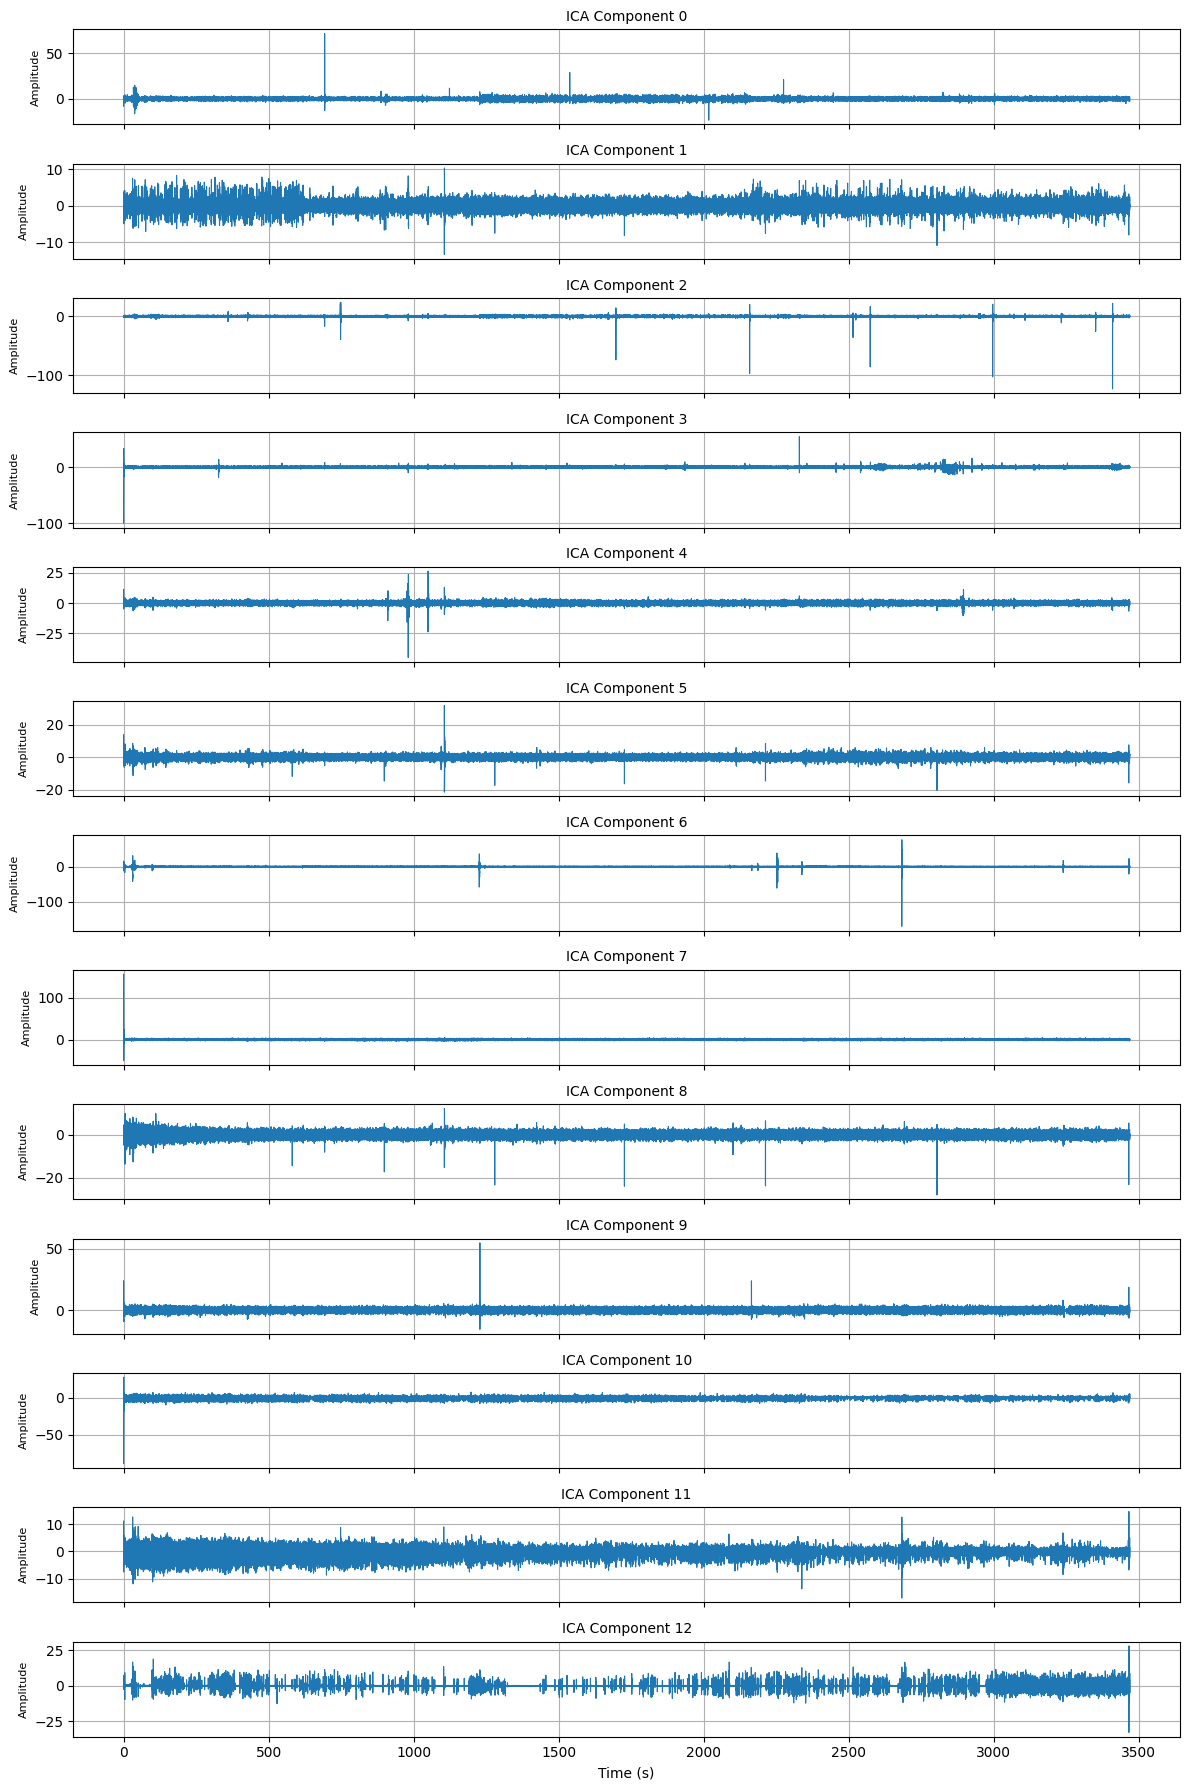

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Lấy tín hiệu ICA từ raw
ica_sources = ica.get_sources(raw).get_data()

# Tạo figure với 13 subplot
n_components = 13
fig, axes = plt.subplots(n_components, 1, figsize=(12, 18), sharex=True)

sfreq = raw.info['sfreq']  # Tần số lấy mẫu
times = np.arange(ica_sources.shape[1]) / sfreq  # Tính thời gian theo giây

for idx in range(n_components):
    ax = axes[idx]
    ax.plot(times, ica_sources[idx], lw=0.8)
    ax.set_title(f'ICA Component {idx}', fontsize=10)
    ax.set_ylabel('Amplitude', fontsize=8)
    ax.grid(True)

# Nhãn trục x cho subplot cuối
axes[-1].set_xlabel('Time (s)', fontsize=10)

# Tinh chỉnh layout
plt.tight_layout()
plt.show()
